In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Load data
df = pd.read_csv("data/ESS11.csv", sep=";", encoding="utf-8",
                usecols=["idno", "respc19a", "vacc19",	"cntry",
                        "eisced","hinctnta", "hhmmb", "netusoft",
                        "gndr", "maritalb", "domicil", "agea", "trstprl",
                        "trstlgl", "trstplc", "trstplt", "trstprt"])

In [4]:
# Show basic structure
print("Shape of the data:", df.shape)

Shape of the data: (46162, 17)


In [5]:
# Display first five rows
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt
0,50014,1.0,1.0,AT,3.0,6.0,2.0,5.0,1,1.0,3.0,65.0,6.0,9.0,10.0,5.0,5.0
1,50030,1.0,1.0,AT,5.0,1.0,1.0,5.0,2,6.0,1.0,21.0,6.0,6.0,4.0,1.0,0.0
2,50057,1.0,1.0,AT,6.0,5.0,3.0,5.0,2,1.0,3.0,53.0,7.0,5.0,8.0,4.0,4.0
3,50106,1.0,1.0,AT,5.0,2.0,1.0,1.0,2,4.0,1.0,78.0,5.0,6.0,9.0,3.0,3.0
4,50145,3.0,1.0,AT,3.0,NaN,2.0,5.0,1,1.0,4.0,64.0,6.0,8.0,8.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46157,86379,1.0,1.0,SK,2.0,5.0,3.0,5.0,1,6.0,4.0,18.0,4.0,5.0,10.0,3.0,3.0
46158,86407,3.0,1.0,SK,4.0,7.0,2.0,2.0,1,1.0,1.0,56.0,4.0,7.0,10.0,4.0,6.0
46159,86408,1.0,1.0,SK,7.0,10.0,3.0,5.0,2,1.0,4.0,31.0,5.0,4.0,5.0,5.0,5.0
46160,86426,3.0,2.0,SK,1.0,NaN,7.0,5.0,1,6.0,4.0,15.0,0.0,5.0,2.0,3.0,NaN


In [6]:
df.isna().sum()

idno           0
respc19a     540
vacc19       342
cntry          0
eisced       188
hinctnta    9847
hhmmb        327
netusoft      42
gndr           0
maritalb     743
domicil      101
agea         357
trstprl      916
trstlgl      976
trstplc      451
trstplt      698
trstprt      840
dtype: int64

In [7]:
df = df[df['cntry'] == 'IT']
print("Length of the Italy data:", df.shape)
df.isna().sum()

Length of the Italy data: (2865, 17)


idno          0
respc19a     67
vacc19       50
cntry         0
eisced       20
hinctnta    985
hhmmb        60
netusoft      2
gndr          0
maritalb     44
domicil      16
agea         30
trstprl      56
trstlgl      60
trstplc      40
trstplt      43
trstprt      47
dtype: int64

Dependent variable encoding

The variable vacc19 tells us whether someone has received at least one COVID-19 vaccination dose. People could answer:

1 = Yes

2 = No

7 = Refusal to answer

8 = Don’t know

9 = No answer

Since we want to model who actually got vaccinated versus who did not, it makes sense to treat:

1 → vaccinated (coded as 1)

2 → not vaccinated (coded as 0)

The other responses (7, 8, 9) do not give us any meaningful information. They just mean the person refused, didn’t know, or skipped the question. Therefore, we should treat them as missing values and remove those rows from the analysis.

In simple words, if people refused to answer, we cannot know their vaccination status — so we have to drop those rows.

In [8]:
# Recode vacc19
df = df[df['vacc19'].isin([1, 2])]  # keep only valid responses
df['vacc19_binary'] = df['vacc19'].map({1: 1, 2: 0})

Research Question:
Which demographic, socioeconomic, and attitudinal factors influenced COVID-19 vaccination uptake in Germany in 2023?

In [9]:
# Recode respc19a as binary (1 = ever infected, 0 = never infected)
df = df[df['respc19a'].isin([1, 2, 3])]
df['respc19a_binary'] = df['respc19a'].map({1: 1, 2: 1, 3: 0})

In [10]:
df['gndr'] = df['gndr'].replace({1: 0, 2: 1})

In [11]:
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt,vacc19_binary,respc19a_binary
27741,50021,1.0,1.0,IT,4.0,NaN,3.0,5.0,0,1.0,4.0,39.0,5.0,6.0,7.0,5.0,4.0,1,1
27742,50036,1.0,1.0,IT,7.0,6.0,1.0,5.0,1,6.0,3.0,29.0,3.0,6.0,6.0,3.0,3.0,1,1
27743,50041,1.0,1.0,IT,2.0,4.0,2.0,5.0,1,6.0,4.0,47.0,5.0,7.0,10.0,4.0,5.0,1,1
27744,50047,1.0,1.0,IT,4.0,NaN,4.0,5.0,1,6.0,4.0,21.0,8.0,4.0,7.0,5.0,6.0,1,1
27745,50057,1.0,1.0,IT,2.0,NaN,4.0,3.0,0,1.0,4.0,62.0,1.0,4.0,4.0,5.0,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,86375,1.0,1.0,IT,1.0,1.0,1.0,1.0,1,5.0,3.0,81.0,3.0,7.0,8.0,1.0,1.0,1,1
30602,86385,3.0,1.0,IT,4.0,9.0,2.0,5.0,0,1.0,4.0,73.0,5.0,6.0,6.0,6.0,5.0,1,0
30603,86418,2.0,1.0,IT,2.0,NaN,4.0,5.0,1,1.0,3.0,54.0,6.0,5.0,7.0,2.0,0.0,1,1
30604,86437,1.0,2.0,IT,6.0,2.0,1.0,5.0,1,6.0,4.0,22.0,4.0,6.0,6.0,3.0,3.0,0,1


In [ ]:
# -----------------------------------------
# 1. Variables with missing codes {7, 8, 9}
# -----------------------------------------
vars_789 = ['netusoft', 'domicil']
for var in vars_789: 
    df = df[~df[var].isin([7,8,9])]

# -----------------------------------------
# 2. Variables with missing codes {77, 88, 99}
# -----------------------------------------
vars_778899 = ['maritalb', 'hinctnta', 'hhmmb',
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt']
for var in vars_778899:
    df = df[~df[var].isin([77,88,99])]

# -----------------------------------------
# 3. Variables with missing codes {7, 8, 9, 77, 88, 99}
# (if any variable had all of these, we could use this, but none does here)
# so we skip this group for now

# -----------------------------------------
# 4. Variables with specific missing codes
# -----------------------------------------

# gender (only 9 means missing)
df = df[df['gndr'] != 9]

# education level (more specific)
df = df[~df['eisced'].isin([55,77,88,99])]

# age (999 means missing)
df = df[df['agea'] != 999]

# country does not need cleaning (mandatory)

# -----------------------------------------
# show cleaned data
# -----------------------------------------
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt,vacc19_binary,respc19a_binary
27741,50021,1.0,1.0,IT,4.0,NaN,3.0,5.0,0,1.0,4.0,39.0,5.0,6.0,7.0,5.0,4.0,1,1
27742,50036,1.0,1.0,IT,7.0,6.0,1.0,5.0,1,6.0,3.0,29.0,3.0,6.0,6.0,3.0,3.0,1,1
27743,50041,1.0,1.0,IT,2.0,4.0,2.0,5.0,1,6.0,4.0,47.0,5.0,7.0,10.0,4.0,5.0,1,1
27744,50047,1.0,1.0,IT,4.0,NaN,4.0,5.0,1,6.0,4.0,21.0,8.0,4.0,7.0,5.0,6.0,1,1
27745,50057,1.0,1.0,IT,2.0,NaN,4.0,3.0,0,1.0,4.0,62.0,1.0,4.0,4.0,5.0,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,86375,1.0,1.0,IT,1.0,1.0,1.0,1.0,1,5.0,3.0,81.0,3.0,7.0,8.0,1.0,1.0,1,1
30602,86385,3.0,1.0,IT,4.0,9.0,2.0,5.0,0,1.0,4.0,73.0,5.0,6.0,6.0,6.0,5.0,1,0
30603,86418,2.0,1.0,IT,2.0,NaN,4.0,5.0,1,1.0,3.0,54.0,6.0,5.0,7.0,2.0,0.0,1,1
30604,86437,1.0,2.0,IT,6.0,2.0,1.0,5.0,1,6.0,4.0,22.0,4.0,6.0,6.0,3.0,3.0,0,1


When some people do not report their household income, it is like a blank spot in the survey. If you simply throw away all those people, you might lose a lot of data (10% in this case). But you also do not want to just make up random numbers.

Using the median to fill in those blanks is reasonable because: a. the median is the “middle” income group, so it is robust to extremely rich or poor people; b. it does not get pulled upward or downward by outliers; c. it gives you a realistic estimate for someone “typical” in the sample

So you are filling in the blanks with a “middle of the road” reasonable value that will not distort your model too much.

In [13]:
df.isnull().sum()

idno                 0
respc19a             0
vacc19               0
cntry                0
eisced              11
hinctnta           927
hhmmb               44
netusoft             2
gndr                 0
maritalb            34
domicil             13
agea                25
trstprl             48
trstlgl             53
trstplc             35
trstplt             39
trstprt             43
vacc19_binary        0
respc19a_binary      0
dtype: int64

In [14]:
df['hinctnta'] = df['hinctnta'].fillna(df['hinctnta'].median())

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

idno               0
respc19a           0
vacc19             0
cntry              0
eisced             0
hinctnta           0
hhmmb              0
netusoft           0
gndr               0
maritalb           0
domicil            0
agea               0
trstprl            0
trstlgl            0
trstplc            0
trstplt            0
trstprt            0
vacc19_binary      0
respc19a_binary    0
dtype: int64

In [17]:
df.to_csv("data/ESS11_IT_cleaned.csv", index=False, sep=";")

Question 4: linear combination check

In [18]:
ctab = None

In [19]:
# check cross-tabulations for each categorical variable before fitting:
for var in ['gndr', 'maritalb', 'domicil', 'cntry', 'eisced', "respc19a_binary",
            "trstprl", "trstlgl", "trstplc", "trstplt", "trstprt"]:
    ctab = pd.crosstab(df[var], df['vacc19_binary'])
    print(f"\nCross-tabulation for {var}:\n", ctab)



Cross-tabulation for gndr:
 vacc19_binary   0     1
gndr                   
0              94  1117
1              90  1281

Cross-tabulation for maritalb:
 vacc19_binary   0     1
maritalb               
1.0            72  1170
2.0             6    18
3.0            15    74
4.0            17   117
5.0            14   241
6.0            60   778

Cross-tabulation for domicil:
 vacc19_binary    0     1
domicil                 
1.0             11   209
2.0             10    66
3.0             56   949
4.0            101  1136
5.0              6    38

Cross-tabulation for cntry:
 vacc19_binary    0     1
cntry                   
IT             184  2398

Cross-tabulation for eisced:
 vacc19_binary   0    1
eisced                
1.0            12  252
2.0            71  736
3.0            16  152
4.0            50  815
5.0             5   74
6.0            19  103
7.0            11  266

Cross-tabulation for respc19a_binary:
 vacc19_binary      0     1
respc19a_binary           
0     

Excluding the "trst-" predictors as some of those provide perfect separation
whereas those which do not provide perfect separation, provide very little evidences which
might lead to bias towards one prediction

check if non-linearity exists

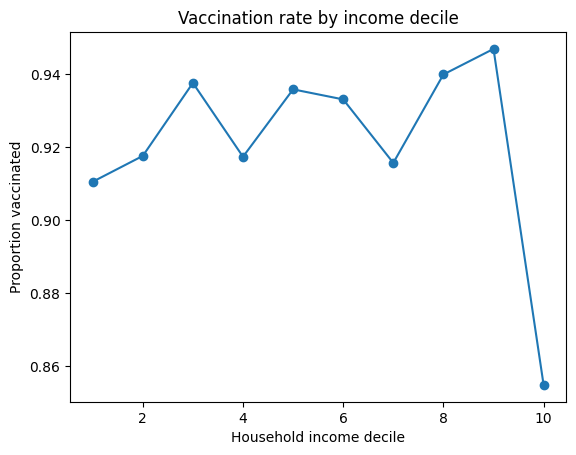

In [20]:
# get vaccination rate by income decile
vacc_rates = df.groupby('hinctnta')['vacc19_binary'].mean()

# plot
plt.plot(vacc_rates.index, vacc_rates.values, marker='o')
plt.xlabel('Household income decile')
plt.ylabel('Proportion vaccinated')
plt.title('Vaccination rate by income decile')
plt.show()


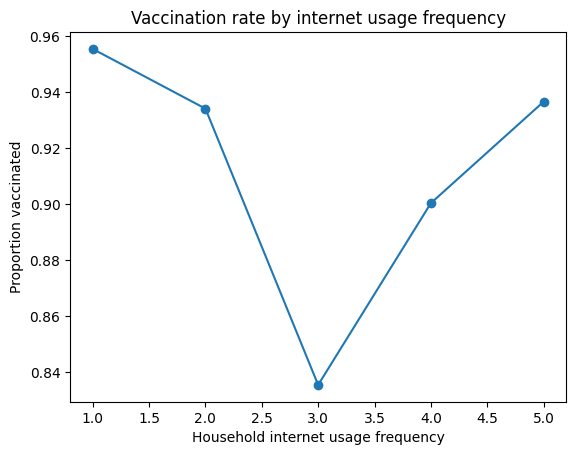

In [21]:
# get vaccination rate by income decile
vacc_rates = df.groupby('netusoft')['vacc19_binary'].mean()

# plot
plt.plot(vacc_rates.index, vacc_rates.values, marker='o')
plt.xlabel('Household internet usage frequency')
plt.ylabel('Proportion vaccinated')
plt.title('Vaccination rate by internet usage frequency')
plt.show()


Unlike Germany here: trstplc and trstlgl will stay as for the other trst- variables, there exist values which 
perfectly separates the dependent variable outcome

In [22]:
# Assuming df is still loaded from previous cleaning steps

# Redefine the list of predictors
predictors = [
    'agea',
    'respc19a_binary',
    'hinctnta',
    'hhmmb',
    'netusoft',
    'gndr',
    "trstlgl",
    "trstplc",
    "trstplt",
    "trstprt"
]

In [23]:
# Dummy code relevant categorical variables
df = pd.get_dummies(df, columns=['maritalb', 'domicil', 'eisced'], drop_first=True)

# Add all dummies to predictors
predictors += [col for col in df.columns if any(x in col for x in ['maritalb_', 'domicil_', 'eisced_'])]

print("Predictors after dummy coding:\n", predictors)
# Make sure there are no non-numeric columns:
for col in predictors:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# # Remove any rows with NA (if missing)
# df_model = df.dropna(subset=predictors + ['vacc19_binary'])
# Drop missing rows
df_model = df.dropna(subset=predictors + ['vacc19_binary'])

Predictors after dummy coding:
 ['agea', 'respc19a_binary', 'hinctnta', 'hhmmb', 'netusoft', 'gndr', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'maritalb_2.0', 'maritalb_3.0', 'maritalb_4.0', 'maritalb_5.0', 'maritalb_6.0', 'domicil_2.0', 'domicil_3.0', 'domicil_4.0', 'domicil_5.0', 'eisced_2.0', 'eisced_3.0', 'eisced_4.0', 'eisced_5.0', 'eisced_6.0', 'eisced_7.0']


In [24]:
# Create design matrix
X = df_model[predictors]
X = sm.add_constant(X)

# Response variable
y = df_model['vacc19_binary']

# Confirm again that X is fully numeric
print(X.dtypes)

# Fit the model
logit_model = sm.Logit(y, X.astype(float))
result = logit_model.fit()

const              float64
agea               float64
respc19a_binary      int64
hinctnta           float64
hhmmb              float64
netusoft           float64
gndr                 int64
trstlgl            float64
trstplc            float64
trstplt            float64
trstprt            float64
maritalb_2.0          bool
maritalb_3.0          bool
maritalb_4.0          bool
maritalb_5.0          bool
maritalb_6.0          bool
domicil_2.0           bool
domicil_3.0           bool
domicil_4.0           bool
domicil_5.0           bool
eisced_2.0            bool
eisced_3.0            bool
eisced_4.0            bool
eisced_5.0            bool
eisced_6.0            bool
eisced_7.0            bool
dtype: object
Optimization terminated successfully.
         Current function value: 0.228415
         Iterations 7


In [25]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          vacc19_binary   No. Observations:                 2582
Model:                          Logit   Df Residuals:                     2556
Method:                           MLE   Df Model:                           25
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                  0.1109
Time:                        01:04:23   Log-Likelihood:                -589.77
converged:                       True   LL-Null:                       -663.30
Covariance Type:            nonrobust   LLR p-value:                 2.931e-19
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0826      0.877      0.094      0.925      -1.637       1.802
agea                0.0233      0.007      3.169      0.002       0.009       0.038
respc19a_binary     0.8975      

In [26]:
# You can also get odds ratios:
odds_ratios = pd.Series(np.exp(result.params), name="Odds Ratio")
print("\nOdds Ratios:\n", odds_ratios)


Odds Ratios:
 const              1.086100
agea               1.023607
respc19a_binary    2.453343
hinctnta           0.952415
hhmmb              1.350815
netusoft           1.053478
gndr               1.192948
trstlgl            0.975204
trstplc            1.212607
trstplt            0.910778
trstprt            0.877999
maritalb_2.0       0.339572
maritalb_3.0       0.608361
maritalb_4.0       0.635804
maritalb_5.0       1.089532
maritalb_6.0       1.612089
domicil_2.0        0.419854
domicil_3.0        1.094580
domicil_4.0        0.682850
domicil_5.0        0.449930
eisced_2.0         0.708608
eisced_3.0         0.841127
eisced_4.0         1.256580
eisced_5.0         1.168361
eisced_6.0         0.446206
eisced_7.0         1.842087
Name: Odds Ratio, dtype: float64


### Model Selection

Several variables were not statistically significant (p > 0.05), including household size, internet use, gender, marital status dummies, trust in parliament, and trust in the legal system.

Retaining non-significant variables increases model complexity without adding explanatory power.

A simpler, more parsimonious model would be clearer for interpretation and more stable.

In [27]:
# initialize design matrix
X = df[predictors]
X = sm.add_constant(X)

# backward selection loop
current_predictors = X.columns.tolist()

while True:
    model = sm.Logit(y, X[current_predictors].astype(float)).fit(disp=0)
    pvalues = model.pvalues.drop('const')
    max_p = pvalues.max()
    if max_p > 0.05:
        worst_predictor = pvalues.idxmax()
        print(f"Dropping {worst_predictor} with p-value {max_p:.4f}")
        current_predictors.remove(worst_predictor)
    else:
        break

# final model
final_model = sm.Logit(y, X[current_predictors].astype(float)).fit()
print(final_model.summary())

# odds ratios
odds_ratios = pd.Series(np.exp(final_model.params), name="Odds Ratio")
print("\nOdds Ratios:\n", odds_ratios)

Dropping maritalb_5.0 with p-value 0.8112
Dropping eisced_5.0 with p-value 0.8150
Dropping domicil_3.0 with p-value 0.8036
Dropping eisced_4.0 with p-value 0.6292
Dropping trstlgl with p-value 0.6137
Dropping netusoft with p-value 0.4109
Dropping hinctnta with p-value 0.3161
Dropping eisced_7.0 with p-value 0.2694
Dropping gndr with p-value 0.2431
Dropping trstplt with p-value 0.2063
Dropping maritalb_4.0 with p-value 0.1843
Dropping maritalb_3.0 with p-value 0.2250
Dropping eisced_3.0 with p-value 0.1337
Dropping maritalb_2.0 with p-value 0.0538
Optimization terminated successfully.
         Current function value: 0.231326
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          vacc19_binary   No. Observations:                 2582
Model:                          Logit   Df Residuals:                     2570
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 